In [1]:
#Importamos todas las librerías necesarias

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.cluster import KMeans

from scipy.stats import boxcox, probplot, norm, shapiro

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Defininmos las función que luego nos servirá para comprobar la normalidad de nuestras variables numéricas.

def comprueba_normalidad(df, return_type='axes', title='Comprobación de normalidad'):
    '''
    Esta función genera automáticamente un dataframe el shapiro test de las variables numéricas
     así como las gráficas referentes a la QQ-plot de cada variable
    '''
    fig_tot = (len(df.columns))
    fig_por_fila = 3
    tamanio_fig  = 4
    num_filas = int( np.ceil(fig_tot/fig_por_fila) )    
    plt.figure( figsize=( fig_por_fila*tamanio_fig+5, num_filas*tamanio_fig+2 ) )
    c = 0 
    shapiro_test = {}
    lambdas = {}
    for i, col in enumerate(df.columns):
        ax = plt.subplot(num_filas, fig_por_fila, i+1)
        probplot(x = df[df.columns[i]], dist=norm, plot=ax)
        plt.title(df.columns[i])
        shapiro_test[df.columns[i]] = shapiro(df[df.columns[i]])
    plt.suptitle(title)
    plt.show()
    shapiro_test = pd.DataFrame(shapiro_test, index=['Test Statistic', 'p-value']).transpose()
    return shapiro_test



In [3]:
#Importamos nuestro fichero clientes completo ya tratado
clientes_df = pd.read_csv("Clientes completo2.csv", header=0, sep=";")
display(clientes_df.head(5))


,id,user_id,sequence_number,event_type,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,6089.0,457,3.0,product,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-07-19 13:51:00+00:00
1,6091.0,457,5.0,purchase,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-07-19 13:51:00+00:00
2,6090.0,457,4.0,cart,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-07-19 13:51:00+00:00
3,6087.0,457,1.0,home,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-07-19 13:51:00+00:00
4,6088.0,457,2.0,department,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-07-19 13:51:00+00:00


In [4]:
#Revisamos tipos de datos
clientes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326248 entries, 0 to 1326247
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1306292 non-null  float64
 1   user_id          1326248 non-null  int64  
 2   sequence_number  1306292 non-null  float64
 3   event_type       1306292 non-null  object 
 4   first_name       1326248 non-null  object 
 5   last_name        1326248 non-null  object 
 6   email            1326248 non-null  object 
 7   age              1326248 non-null  int64  
 8   gender           1326248 non-null  object 
 9   state            1326248 non-null  object 
 10  street_address   1326248 non-null  object 
 11  postal_code      1326248 non-null  object 
 12  city             1313875 non-null  object 
 13  country          1326248 non-null  object 
 14  latitude         1326248 non-null  float64
 15  longitude        1326248 non-null  float64
 16  traffic_source   1

In [5]:
clientes_df.columns

Index(['id', 'user_id', 'sequence_number', 'event_type', 'first_name',
       'last_name', 'email', 'age', 'gender', 'state', 'street_address',
       'postal_code', 'city', 'country', 'latitude', 'longitude',
       'traffic_source', 'created_at'],
      dtype='object')

In [6]:
clientes_df["city"].value_counts()


Shanghai             33535
Beijing              30136
Seoul                19652
Shenzhen             18229
Dongguan             12644
                     ...  
Canteleu                 1
Kelsterbach              1
Le Fidelaire             1
Noosa North Shore        1
Sandy Creek              1
Name: city, Length: 7883, dtype: int64

In [7]:
clientes_df["country"].value_counts()

China             459282
United States     294302
Brasil            192568
South Korea        69580
France             62179
United Kingdom     61024
Germany            56548
Spain              52992
Japan              31817
Australia          27309
Belgium            15029
Poland              3455
Colombia             126
España                21
Austria               10
Deutschland            6
Name: country, dtype: int64

In [8]:
#Cambiamos el valor "EspaÃ±a" por"Spain"
clientes_df["country"]=clientes_df["country"].replace("EspaÃ±a","Spain")

In [9]:
clientes_df["country"].value_counts()

China             459282
United States     294302
Brasil            192568
South Korea        69580
France             62179
United Kingdom     61024
Germany            56548
Spain              52992
Japan              31817
Australia          27309
Belgium            15029
Poland              3455
Colombia             126
España                21
Austria               10
Deutschland            6
Name: country, dtype: int64

In [10]:
clientes_df["traffic_source"].value_counts()

Search      928793
Organic     200694
Facebook     76343
Email        66934
Display      53484
Name: traffic_source, dtype: int64

In [11]:
clientes_df["event_type"].value_counts()

product       345607
cart          345607
department    345607
purchase      181759
home           87712
Name: event_type, dtype: int64

In [12]:
clientes_df["gender"].value_counts()

F    664276
M    661972
Name: gender, dtype: int64

In [13]:
clientes_df.isnull().sum() / len(clientes_df) * 100

id                 1.504696
user_id            0.000000
sequence_number    1.504696
event_type         1.504696
first_name         0.000000
last_name          0.000000
email              0.000000
age                0.000000
gender             0.000000
state              0.000000
street_address     0.000000
postal_code        0.000000
city               0.932933
country            0.000000
latitude           0.000000
longitude          0.000000
traffic_source     0.000000
created_at         0.000000
dtype: float64

In [14]:
#llamamos Desconocido a la city sin valor en la tabla
clientes_df["city"].fillna("Desconocido",inplace=True)

In [14]:
#llamamos 0 event_type desconocido 
clientes_df["event_type"].fillna(0,inplace=True)

In [15]:
#llamamos 0 sequence_number desconocido 
clientes_df["sequence_number"].fillna(0,inplace=True)

In [16]:
clientes_df.isnull().sum() / len(clientes_df) * 100

id                 1.504696
user_id            0.000000
sequence_number    0.000000
event_type         0.000000
first_name         0.000000
last_name          0.000000
email              0.000000
age                0.000000
gender             0.000000
state              0.000000
street_address     0.000000
postal_code        0.000000
city               0.932933
country            0.000000
latitude           0.000000
longitude          0.000000
traffic_source     0.000000
created_at         0.000000
dtype: float64

In [17]:
#extraemos de la tabla aquellas variables que no nos interesan en este momento
clientes_df.drop(["id","first_name","last_name","email","state","latitude","street_address","longitude","postal_code","city","created_at"], axis=1, inplace=True)

In [18]:
clientes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326248 entries, 0 to 1326247
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   user_id          1326248 non-null  int64  
 1   sequence_number  1326248 non-null  float64
 2   event_type       1326248 non-null  object 
 3   age              1326248 non-null  int64  
 4   gender           1326248 non-null  object 
 5   country          1326248 non-null  object 
 6   traffic_source   1326248 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 70.8+ MB


In [19]:
#Comprobamos con las que nos hemos quedado
display(clientes_df.head(1))

,user_id,sequence_number,event_type,age,gender,country,traffic_source
0,457,3.0,product,65,M,Brasil,Search


In [20]:
clientes_clusterizado=clientes_df.copy()

In [21]:
clientes_clusterizado.drop(["user_id"], axis=1, inplace=True)

In [24]:
clientes_clusterizado.drop(["sequence_number"], axis=1, inplace=True)

In [25]:
#definimos las variables numéricas
numeric = clientes_clusterizado.select_dtypes(exclude="object")
var_numericas = numeric.columns
var_numericas

Index(['age'], dtype='object')

In [26]:
#comprobamos su normalización con la función definida al comienzo
from scipy.stats import shapiro

for columna_numerica  in var_numericas:
    # Aplicamos shapiro
    stat, p = shapiro(clientes_clusterizado[columna_numerica])
    
    print('Valor de test=%.3f, p-value=%.3f' % (stat, p))
    # Interpretación de resultados
    alpha = 0.05
    if p > alpha:
        print('La variable ',columna_numerica, ' proviene de una distribución normal (no rechazamos H0) \n')
    else:
        print('La variable ',columna_numerica, ' no proviene de una distribución normal (rechazamos H0), por lo tanto H1 \n')

Valor de test=0.948, p-value=0.000
La variable  age  no proviene de una distribución normal (rechazamos H0), por lo tanto H1 



In [27]:
#Normalizamos las 3 variables con sklearn
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()

clientes_clusterizado[var_numericas] = sc.fit_transform(clientes_clusterizado[var_numericas])

In [29]:
clientes_clusterizado

,event_type,age,gender,country,traffic_source
0,product,1.404705,M,Brasil,Search
1,purchase,1.404705,M,Brasil,Search
2,cart,1.404705,M,Brasil,Search
3,home,1.404705,M,Brasil,Search
4,department,1.404705,M,Brasil,Search
...,...,...,...,...,...
1326243,product,1.522154,F,France,Search
1326244,cart,1.522154,F,France,Search
1326245,product,1.522154,F,France,Search
1326246,department,1.522154,F,France,Search


In [30]:
clientes_clusterizado.columns

Index(['event_type', 'age', 'gender', 'country', 'traffic_source'], dtype='object')

In [31]:
clientes_clusterizado = pd.get_dummies(clientes_clusterizado, columns=['gender', "event_type" ,'country', 'traffic_source'])

In [32]:
clientes_clusterizado.columns

Index(['age', 'gender_F', 'gender_M', 'event_type_0', 'event_type_cart',
       'event_type_department', 'event_type_home', 'event_type_product',
       'event_type_purchase', 'country_Australia', 'country_Austria',
       'country_Belgium', 'country_Brasil', 'country_China',
       'country_Colombia', 'country_Deutschland', 'country_España',
       'country_France', 'country_Germany', 'country_Japan', 'country_Poland',
       'country_South Korea', 'country_Spain', 'country_United Kingdom',
       'country_United States', 'traffic_source_Display',
       'traffic_source_Email', 'traffic_source_Facebook',
       'traffic_source_Organic', 'traffic_source_Search'],
      dtype='object')

In [33]:
def plot_dispersion(x, figure_name, max_k = 25):
    inertia = []

    for k in range(2, max_k):
        kmeans = KMeans(n_clusters = k, n_init=10).fit(x)
        inertia.append(kmeans.inertia_) 

    plt.plot(range(2, max_k), inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Dispersión')
    plt.title(figure_name)

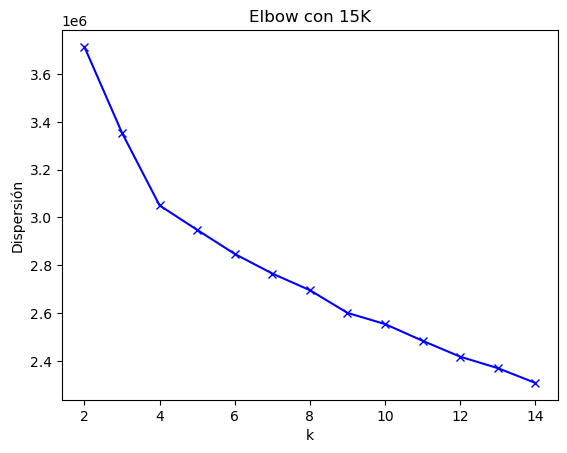

In [34]:
#Comprobamos como mostraría la gráfica en caso de elegir 15klusters para ver si encontramos el codo...
plot_dispersion(x=clientes_clusterizado, figure_name="Elbow con 15K",max_k=15)

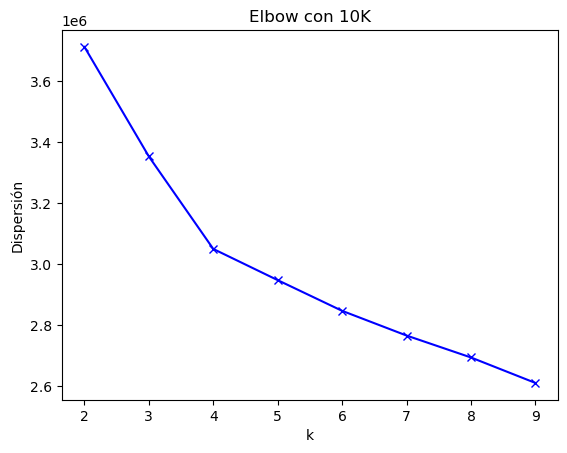

In [35]:
#Ahora con 10 clusters
plot_dispersion(x=clientes_clusterizado, figure_name="Elbow con 10K",max_k=10)

In [36]:
#Parece que el nº de klusters idoneo es 4. Entrenamos KMeans con k = 4
model = KMeans(n_clusters=4, n_init="auto")
model.fit(clientes_clusterizado)

KMeans(n_clusters=4, n_init='auto')

In [37]:
predicciones=model.predict(clientes_clusterizado)

In [38]:
print("primeras predicciones:")
print(predicciones[:20])

primeras predicciones:
[0 0 0 0 0 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [39]:
# Añadimos las predicciones como una nueva columna 'segmento' en el DataFrame
clientes_df['segmento'] = predicciones



In [40]:
clientes_df.columns

Index(['user_id', 'sequence_number', 'event_type', 'age', 'gender', 'country',
       'traffic_source', 'segmento'],
      dtype='object')

In [41]:
display(clientes_df.head(5))

,user_id,sequence_number,event_type,age,gender,country,traffic_source,segmento
0,457,3.0,product,65,M,Brasil,Search,0
1,457,5.0,purchase,65,M,Brasil,Search,0
2,457,4.0,cart,65,M,Brasil,Search,0
3,457,1.0,home,65,M,Brasil,Search,0
4,457,2.0,department,65,M,Brasil,Search,0


In [42]:
#extraemos de la tabla todas las columnas a excepción del user_id y el segmento
clientes_df.drop(['sequence_number', 'event_type', 'age', 'gender', 'country',
       'traffic_source'], axis=1, inplace=True)

In [43]:
display(clientes_df.head(5))

,user_id,segmento
0,457,0
1,457,0
2,457,0
3,457,0
4,457,0


In [44]:
clientes_df.info

<bound method DataFrame.info of          user_id  segmento
0            457         0
1            457         0
2            457         0
3            457         0
4            457         0
...          ...       ...
1326243    77764         1
1326244    77764         1
1326245    77764         1
1326246    77764         1
1326247    77764         1

[1326248 rows x 2 columns]>

In [45]:
clientes_df.to_csv('clientes_clusterizado3.csv', sep=';', index=False)